<a href="https://colab.research.google.com/github/DivyaMeenaSundaram/Deep_Learning_Lab/blob/main/Basics%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted Output:
[[0.5       ]
 [0.41338242]
 [0.59145898]
 [0.5       ]]
Loss: 0.6987098665673257


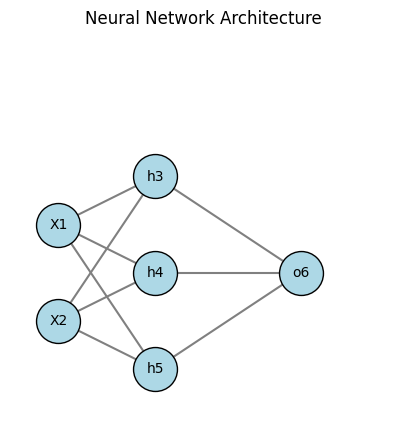

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define input features
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR-like classification
Y = np.array([[0], [1], [1], [0]])  # Expected output

# Define weights and biases
W1 = np.array([[0.5, -0.5, 0.2], [-0.5, 0.5, -0.3]])  # Weights for layer 1 (2 input features, 3 neurons in hidden layer)
b1 = np.array([[0.0, 0.0, 0.0]])  # Bias for layer 1 (3 neurons)
W2 = np.array([[0.7], [-0.7], [0.1]])  # Weights for output layer (3 neurons in hidden layer, 1 output)
b2 = np.array([[0.0]])  # Bias for output layer (1 neuron)

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward pass
def forward_pass(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    return output

# Compute predictions
y_pred = forward_pass(X)
print("Predicted Output:")
print(y_pred)

# Compute loss (Binary Crossentropy)
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-12  # Avoid log(0) error
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

loss = binary_cross_entropy(Y, y_pred)
print("Loss:", loss)

# Visualization of the Neural Network
def draw_neural_network():
    plt.figure(figsize=(5, 5))
    plt.xlim(-1.5, 2.5)
    plt.ylim(-1.5, 2.5)

    # Define positions
    positions = {
        "X1": (-1, 0.5), "X2": (-1, -0.5),
        "h3": (0, 1), "h4": (0, 0), "h5": (0, -1),
        "o6": (1.5, 0)
    }

    # Draw nodes
    for node, pos in positions.items():
        plt.scatter(*pos, s=1000, color='lightblue', edgecolors='black', zorder=3)
        plt.text(pos[0], pos[1], node, fontsize=10, ha='center', va='center', zorder=4)

    # Draw edges
    edges = [("X1", "h3"), ("X1", "h4"), ("X1", "h5"),
             ("X2", "h3"), ("X2", "h4"), ("X2", "h5"),
             ("h3", "o6"), ("h4", "o6"), ("h5", "o6")]

    for start, end in edges:
        pos1, pos2 = positions[start], positions[end]
        plt.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], 'gray', zorder=2)

    plt.title("Neural Network Architecture")
    plt.axis('off')
    plt.show()

# Draw the neural network
draw_neural_network()


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define input features
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR-like classification
Y = np.array([[0], [1], [1], [0]])  # Expected output

# Define weights and biases
W1 = np.array([[0.5, -0.5, 0.2], [-0.5, 0.5, -0.3]])  # Weights for layer 1 (2 input features, 3 neurons in hidden layer)
b1 = np.array([[0.0, 0.0, 0.0]])  # Bias for layer 1 (3 neurons)
W2 = np.array([[0.7], [-0.7], [0.1]])  # Weights for output layer (3 neurons in hidden layer, 1 output)
b2 = np.array([[0.0]])  # Bias for output layer (1 neuron)

# Learning rate (how big the step is when updating weights)
learning_rate = 0.1

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Derivative of ReLU for backpropagation
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Forward pass
def forward_pass(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    return a1, output  # We return hidden layer output (a1) and final output

# Backpropagation function
def backpropagate(X, Y, a1, output):
    global W1, W2, b1, b2  # We will update these globally

    # Compute the error at the output layer
    output_error = Y - output  # How wrong the prediction is
    output_delta = output_error * sigmoid_derivative(output)  # How to adjust weights to fix this error

    # Compute error for hidden layer
    hidden_error = output_delta.dot(W2.T)  # Error from output delta
    hidden_delta = hidden_error * relu_derivative(a1)  # Adjust hidden layer weights

    # Update the weights and biases using the gradients
    W2 += a1.T.dot(output_delta) * learning_rate  # Update weights between hidden and output layer
    b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate  # Update bias for output layer

    W1 += X.T.dot(hidden_delta) * learning_rate  # Update weights between input and hidden layer
    b1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate  # Update bias for hidden layer

# Training the model (running forward and backward passes multiple times)
for epoch in range(10000):  # Training for 10,000 iterations
    a1, output = forward_pass(X)  # Forward pass to get predictions
    backpropagate(X, Y, a1, output)  # Backpropagation to update weights

    if epoch % 1000 == 0:  # Print the loss every 1000 iterations
        loss = np.mean(np.square(Y - output))  # Mean Squared Error loss
        print(f"Epoch {epoch}, Loss: {loss}")

# Final predictions after training
a1, final_output = forward_pass(X)
print("Final Predicted Output after Training:")
print(final_output)



Epoch 0, Loss: 0.2527564875495044
Epoch 1000, Loss: 0.16706379847542388
Epoch 2000, Loss: 0.16680530527419363
Epoch 3000, Loss: 0.16674880699715516
Epoch 4000, Loss: 0.1667254693987577
Epoch 5000, Loss: 0.16671494753467997
Epoch 6000, Loss: 0.16670441858968832
Epoch 7000, Loss: 0.16669917704167897
Epoch 8000, Loss: 0.16669144557246157
Epoch 9000, Loss: 0.16668846810617274
Final Predicted Output after Training:
[[0.33345665]
 [0.33345665]
 [0.99063755]
 [0.33345665]]


Epoch 0, Loss: 0.2527564875495044
Epoch 1000, Loss: 0.16706379847542388
Epoch 2000, Loss: 0.16680530527419363
Epoch 3000, Loss: 0.16674880699715516
Epoch 4000, Loss: 0.1667254693987577
Epoch 5000, Loss: 0.16671494753467997
Epoch 6000, Loss: 0.16670441858968832
Epoch 7000, Loss: 0.16669917704167897
Epoch 8000, Loss: 0.16669144557246157
Epoch 9000, Loss: 0.16668846810617274


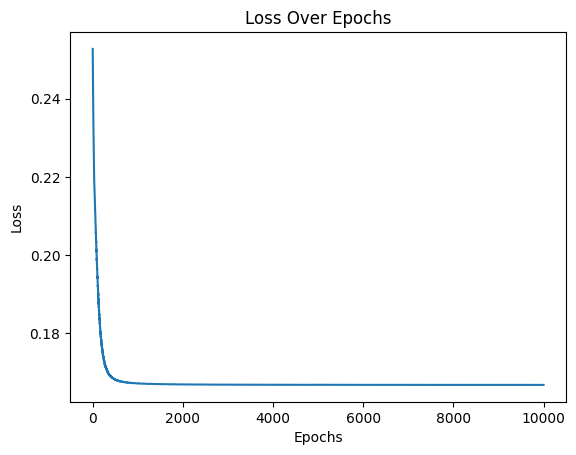

Final Predicted Output after Training:
[[0.33345665]
 [0.33345665]
 [0.99063755]
 [0.33345665]]
Final Loss after 10,000 epochs: 0.1666885919570167


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define input features
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR-like classification
Y = np.array([[0], [1], [1], [0]])  # Expected output

# Define weights and biases
W1 = np.array([[0.5, -0.5, 0.2], [-0.5, 0.5, -0.3]])  # Weights for layer 1 (2 input features, 3 neurons in hidden layer)
b1 = np.array([[0.0, 0.0, 0.0]])  # Bias for layer 1 (3 neurons)
W2 = np.array([[0.7], [-0.7], [0.1]])  # Weights for output layer (3 neurons in hidden layer, 1 output)
b2 = np.array([[0.0]])  # Bias for output layer (1 neuron)

# Learning rate (how big the step is when updating weights)
learning_rate = 0.1

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Derivative of ReLU for backpropagation
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Forward pass
def forward_pass(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    return a1, output  # We return hidden layer output (a1) and final output

# Backpropagation function
def backpropagate(X, Y, a1, output):
    global W1, W2, b1, b2  # We will update these globally

    # Compute the error at the output layer
    output_error = Y - output  # How wrong the prediction is
    output_delta = output_error * sigmoid_derivative(output)  # How to adjust weights to fix this error

    # Compute error for hidden layer
    hidden_error = output_delta.dot(W2.T)  # Error from output delta
    hidden_delta = hidden_error * relu_derivative(a1)  # Adjust hidden layer weights

    # Update the weights and biases using the gradients
    W2 += a1.T.dot(output_delta) * learning_rate  # Update weights between hidden and output layer
    b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate  # Update bias for output layer

    W1 += X.T.dot(hidden_delta) * learning_rate  # Update weights between input and hidden layer
    b1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate  # Update bias for hidden layer

# Store loss for each epoch to plot
losses = []

# Training the model (running forward and backward passes multiple times)
for epoch in range(10000):  # Training for 10,000 iterations
    a1, output = forward_pass(X)  # Forward pass to get predictions
    backpropagate(X, Y, a1, output)  # Backpropagation to update weights

    # Calculate loss after each epoch
    loss = np.mean(np.square(Y - output))  # Mean Squared Error loss
    losses.append(loss)  # Store loss for plotting

    # Optionally, print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plot loss over epochs
plt.plot(range(10000), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.show()

# Final predictions after training
a1, final_output = forward_pass(X)
final_loss = np.mean(np.square(Y - final_output))  # Calculate final loss
print("Final Predicted Output after Training:")
print(final_output)
print(f"Final Loss after 10,000 epochs: {final_loss}")


Epoch 0, Loss: 0.2527564875495044, Accuracy: 75.0%
Epoch 1000, Loss: 0.16706379847542388, Accuracy: 75.0%
Epoch 2000, Loss: 0.16680530527419363, Accuracy: 75.0%
Epoch 3000, Loss: 0.16674880699715516, Accuracy: 75.0%
Epoch 4000, Loss: 0.1667254693987577, Accuracy: 75.0%
Epoch 5000, Loss: 0.16671494753467997, Accuracy: 75.0%
Epoch 6000, Loss: 0.16670441858968832, Accuracy: 75.0%
Epoch 7000, Loss: 0.16669917704167897, Accuracy: 75.0%
Epoch 8000, Loss: 0.16669144557246157, Accuracy: 75.0%
Epoch 9000, Loss: 0.16668846810617274, Accuracy: 75.0%


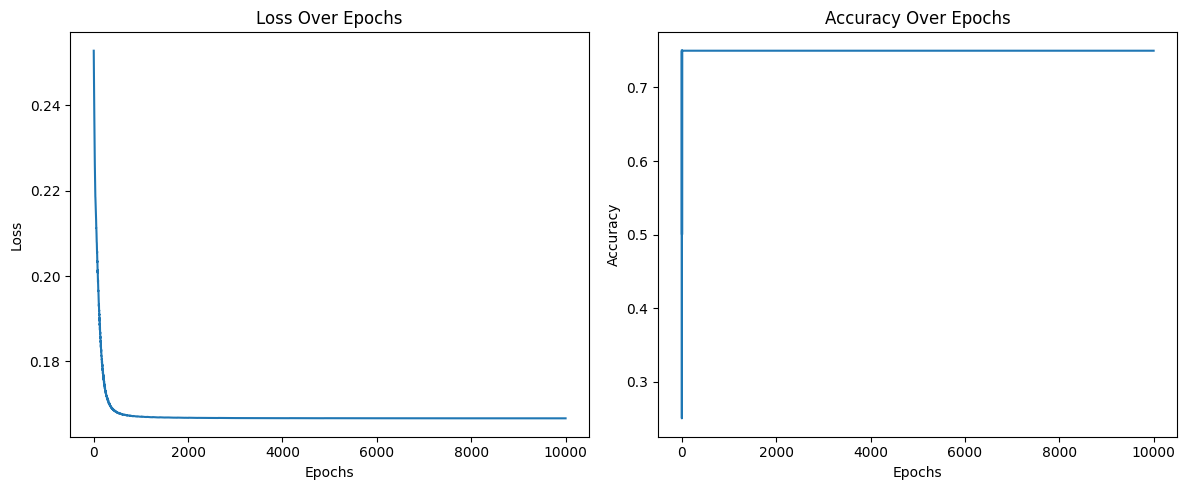

Final Predicted Output after Training:
[[0.33345665]
 [0.33345665]
 [0.99063755]
 [0.33345665]]
Final Loss after 10,000 epochs: 0.1666885919570167
Final Accuracy after 10,000 epochs: 75.0%


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define input features
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR-like classification
Y = np.array([[0], [1], [1], [0]])  # Expected output

# Define weights and biases
W1 = np.array([[0.5, -0.5, 0.2], [-0.5, 0.5, -0.3]])  # Weights for layer 1 (2 input features, 3 neurons in hidden layer)
b1 = np.array([[0.0, 0.0, 0.0]])  # Bias for layer 1 (3 neurons)
W2 = np.array([[0.7], [-0.7], [0.1]])  # Weights for output layer (3 neurons in hidden layer, 1 output)
b2 = np.array([[0.0]])  # Bias for output layer (1 neuron)

# Learning rate (how big the step is when updating weights)
learning_rate = 0.1

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Derivative of ReLU for backpropagation
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Forward pass
def forward_pass(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    return a1, output  # We return hidden layer output (a1) and final output

# Backpropagation function
def backpropagate(X, Y, a1, output):
    global W1, W2, b1, b2  # We will update these globally

    # Compute the error at the output layer
    output_error = Y - output  # How wrong the prediction is
    output_delta = output_error * sigmoid_derivative(output)  # How to adjust weights to fix this error

    # Compute error for hidden layer
    hidden_error = output_delta.dot(W2.T)  # Error from output delta
    hidden_delta = hidden_error * relu_derivative(a1)  # Adjust hidden layer weights

    # Update the weights and biases using the gradients
    W2 += a1.T.dot(output_delta) * learning_rate  # Update weights between hidden and output layer
    b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate  # Update bias for output layer

    W1 += X.T.dot(hidden_delta) * learning_rate  # Update weights between input and hidden layer
    b1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate  # Update bias for hidden layer

# Store loss and accuracy for each epoch to plot
losses = []
accuracies = []

# Training the model (running forward and backward passes multiple times)
for epoch in range(10000):  # Training for 10,000 iterations
    a1, output = forward_pass(X)  # Forward pass to get predictions
    backpropagate(X, Y, a1, output)  # Backpropagation to update weights

    # Calculate loss (Mean Squared Error)
    loss = np.mean(np.square(Y - output))  # Mean Squared Error loss
    losses.append(loss)  # Store loss for plotting

    # Calculate accuracy
    predictions = (output > 0.5).astype(int)  # Apply threshold to sigmoid output
    accuracy = np.mean(predictions == Y)  # Compare predictions with true labels
    accuracies.append(accuracy)  # Store accuracy for plotting

    # Optionally, print loss and accuracy every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy * 100}%")

# Plot loss over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(10000), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')

# Plot accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(range(10000), accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')

plt.tight_layout()
plt.show()

# Final predictions after training
a1, final_output = forward_pass(X)
final_loss = np.mean(np.square(Y - final_output))  # Calculate final loss
final_accuracy = np.mean((final_output > 0.5).astype(int) == Y)  # Calculate final accuracy

print("Final Predicted Output after Training:")
print(final_output)
print(f"Final Loss after 10,000 epochs: {final_loss}")
print(f"Final Accuracy after 10,000 epochs: {final_accuracy * 100}%")
